In [1]:
# Initialize Otter
import otter
grader = otter.Notebook()

# DATA 601: HW4
## Fall 2020

### Due: Thur. Oct. 15, 2020 (by 23:55) 

**Learning Objectives**
- Wrangle and organize data for the purpose of visualization.
- Explore charts for hierarchical and geographic data.
- Produce interactive charts and plots. 

_This is an individual homework assignment._ 

Please complete this homework assignment within the Jupypter notebook environment, and provide your answers where indicated.

#### Submission 

Your submission will be manually tested and graded. In order to ensure that everything goes smoothly, please ensure that: 

- your notebook runs on the Data Science Hub environment, 
- you have provided your solutions where asked without altering any other parts of this notebook,
- you have followed the instructions outlined in the last cell of this notebook to prepare your work for submission on Gradescope.ca.

_You do not need to submit any datasets._

<!-- BEGIN QUESTION -->

## Imports

Please put all your imports in the cell below. This will faciliate the testing and grading process.

<!--
BEGIN QUESTION
name: q0_imports
manual: true
-->

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

import plotly as plotly
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go

py.init_notebook_mode(connected=True)


<!-- END QUESTION -->



## Question 1: Visualizing Hierarchical Data (12 points)

### Warmup
For this question, we'll use plotly express to produce two visualizations that show hierarchical information: Treemaps and Sunburst charts. Please read about these charts at the Data Viz Catalogue: [Treemap](https://datavizcatalogue.com/methods/treemap.html), [Sunburst chart](https://datavizcatalogue.com/methods/sunburst_diagram.html). 
Please also go through the documentation provided by plotly exprerss and familiarize yourself with the structure of the dataframe from which these charts are produced: [treemap](https://plotly.com/python/treemaps/), [sunburst chart](https://plotly.com/python/sunburst-charts/).

### Data
- Please download the [Corporate Energy Cosumption](https://data.calgary.ca/Environment/Corporate-Energy-Consumption/crbp-innf) dataset from the City of Calgary's open data portal.

### Tasks

- Familiarize yourself with the columns in the dataset and do some cleanup:
    - For this question, we'll work with the year 2019. You may discard the other years.
    - Observe that some of the cunsumption is reported in 'GJ' units while the rest is in 'kWh' units. For comparison, we need to convert everything to the same unit. Convert the `Total Consumption` reported in 'GJ' to 'kWh' by multiplying the relevant rows by 277.78.
- Use plotly express to produce a treemap showing the total consumption for the year 2019 with `Energy Description` at the first (top) level, followed by `Business Unit Desc` at the second level, followed by `FacilityName` at the third level. 
- Use plotly express to produce a sunburst chart showing the total consumption for the year 2019 with `Energy Description` at the first (innermost) level, followed by `Business Unit Desc` at the second level, followed by `FacilityName` at the third level.
- Compare and contrast the two visualizations and comment on the following:
  - If the task involved quickly identifying all the information at a particular level, which chart would be better?
  - Which chart makes more efficient use of screen space real estate?
  - Readability of information.


<!-- BEGIN QUESTION -->

_Please do data reading and cleanup in the cell below._

<!--
BEGIN QUESTION
name: q1_cleanup
manual: true
-->

In [2]:
rdata = pd.read_csv("Corporate_Energy_Consumption.csv")
A2019 = rdata.drop(rdata.loc[rdata['Year']!=2019].index)
B2019 = A2019
GJ= (A2019['Unit'] == 'GJ')
B2019.loc[GJ, 'Total Consumption'] = 277.778*A2019.loc[GJ, 'Total Consumption']
B2019 = B2019[pd.notnull(B2019['Total Consumption'])]
B2019 = B2019[B2019['Total Consumption'] != 0]
B2019 = B2019.drop(['Unit','Site ID','FacilityAddress','Month','Year'],axis =1)
B2019 = B2019.groupby(['Energy Description','Business Unit Desc','FacilityName']).sum()
B2019 = B2019.reset_index()
display(B2019)

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning:

Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.



,Energy Description,Business Unit Desc,FacilityName,Total Consumption
0,District Energy,Calgary Parking Auth,PARKING - DOWNTOWN PARKADE - LOT 36 CITY HALL,2.585835e+06
1,District Energy,Facility Management,ALBERTA TRADE CENTRE - FM,1.793057e+06
2,District Energy,Facility Management,ANDREW DAVISON,5.568616e+06
3,District Energy,Facility Management,MUNICIPAL COMPLEX,4.408865e+07
4,Electricity,CPS - Bureaus,AERO CENTRE,2.032560e+05
...,...,...,...,...
1303,Solar Power,Facility Management,WHITEHORN MULTI SERVICE CENTRE,4.262020e+05
1304,Solar Power,Waste - Recycling Services,SH - BLDG W (COMPOST FACILITY),1.316807e+06
1305,Solar Power,Water Services,BEARSPAW WATER TREATMENT PLANT,6.525870e+05
1306,Solar Power,Water Services,GLENMORE WATER TREATMENT PLANT - WB,2.714160e+05


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

_Please provide your code for the treemap chart in the cell below._

<!--
BEGIN QUESTION
name: q1_treemap
manual: true
-->

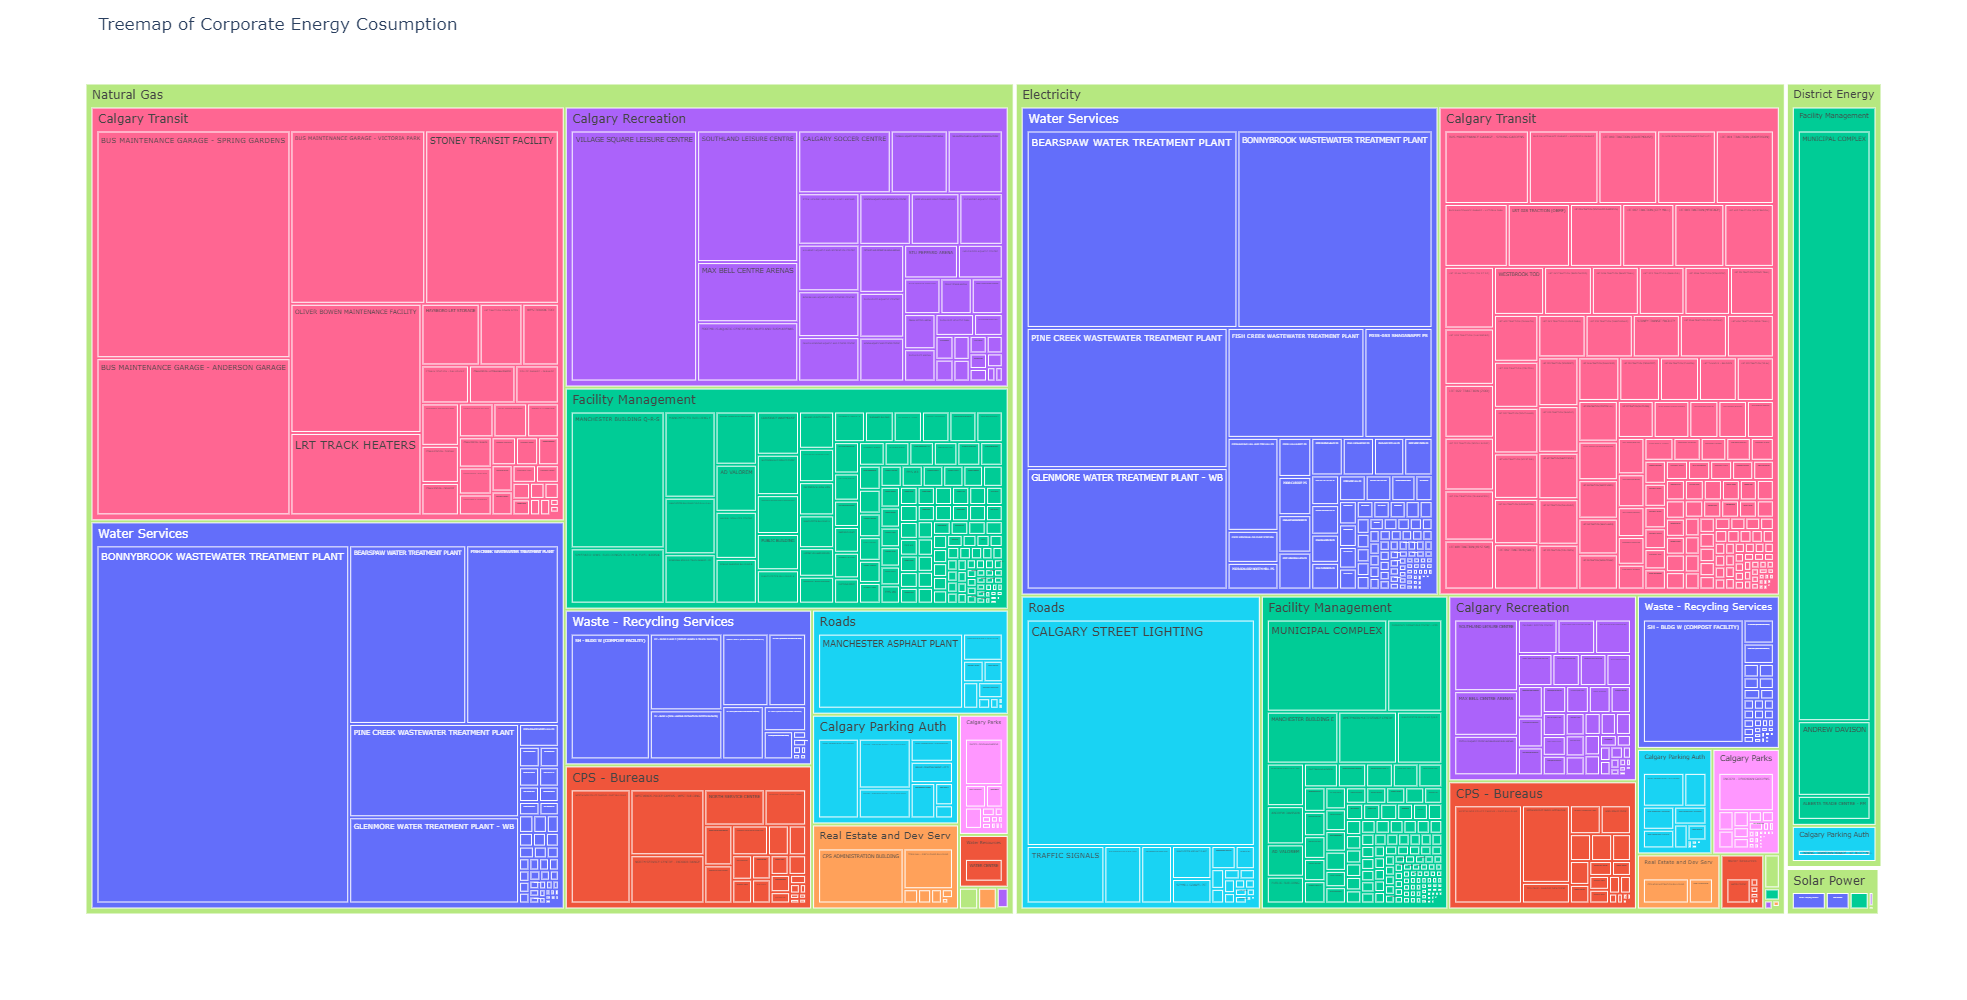

In [26]:

fig = px.treemap(B2019, path=['Energy Description', 'Business Unit Desc', 'FacilityName'], values='Total Consumption',color = 'Business Unit Desc', width = 1500, height = 1000)
fig.update_layout(
    title_text = 'Treemap of Corporate Energy Cosumption '    
)
fig.show()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

_Please provide your code for the sunburst chart in the cell below._

<!--
BEGIN QUESTION
name: q1_sunburst
manual: true
-->

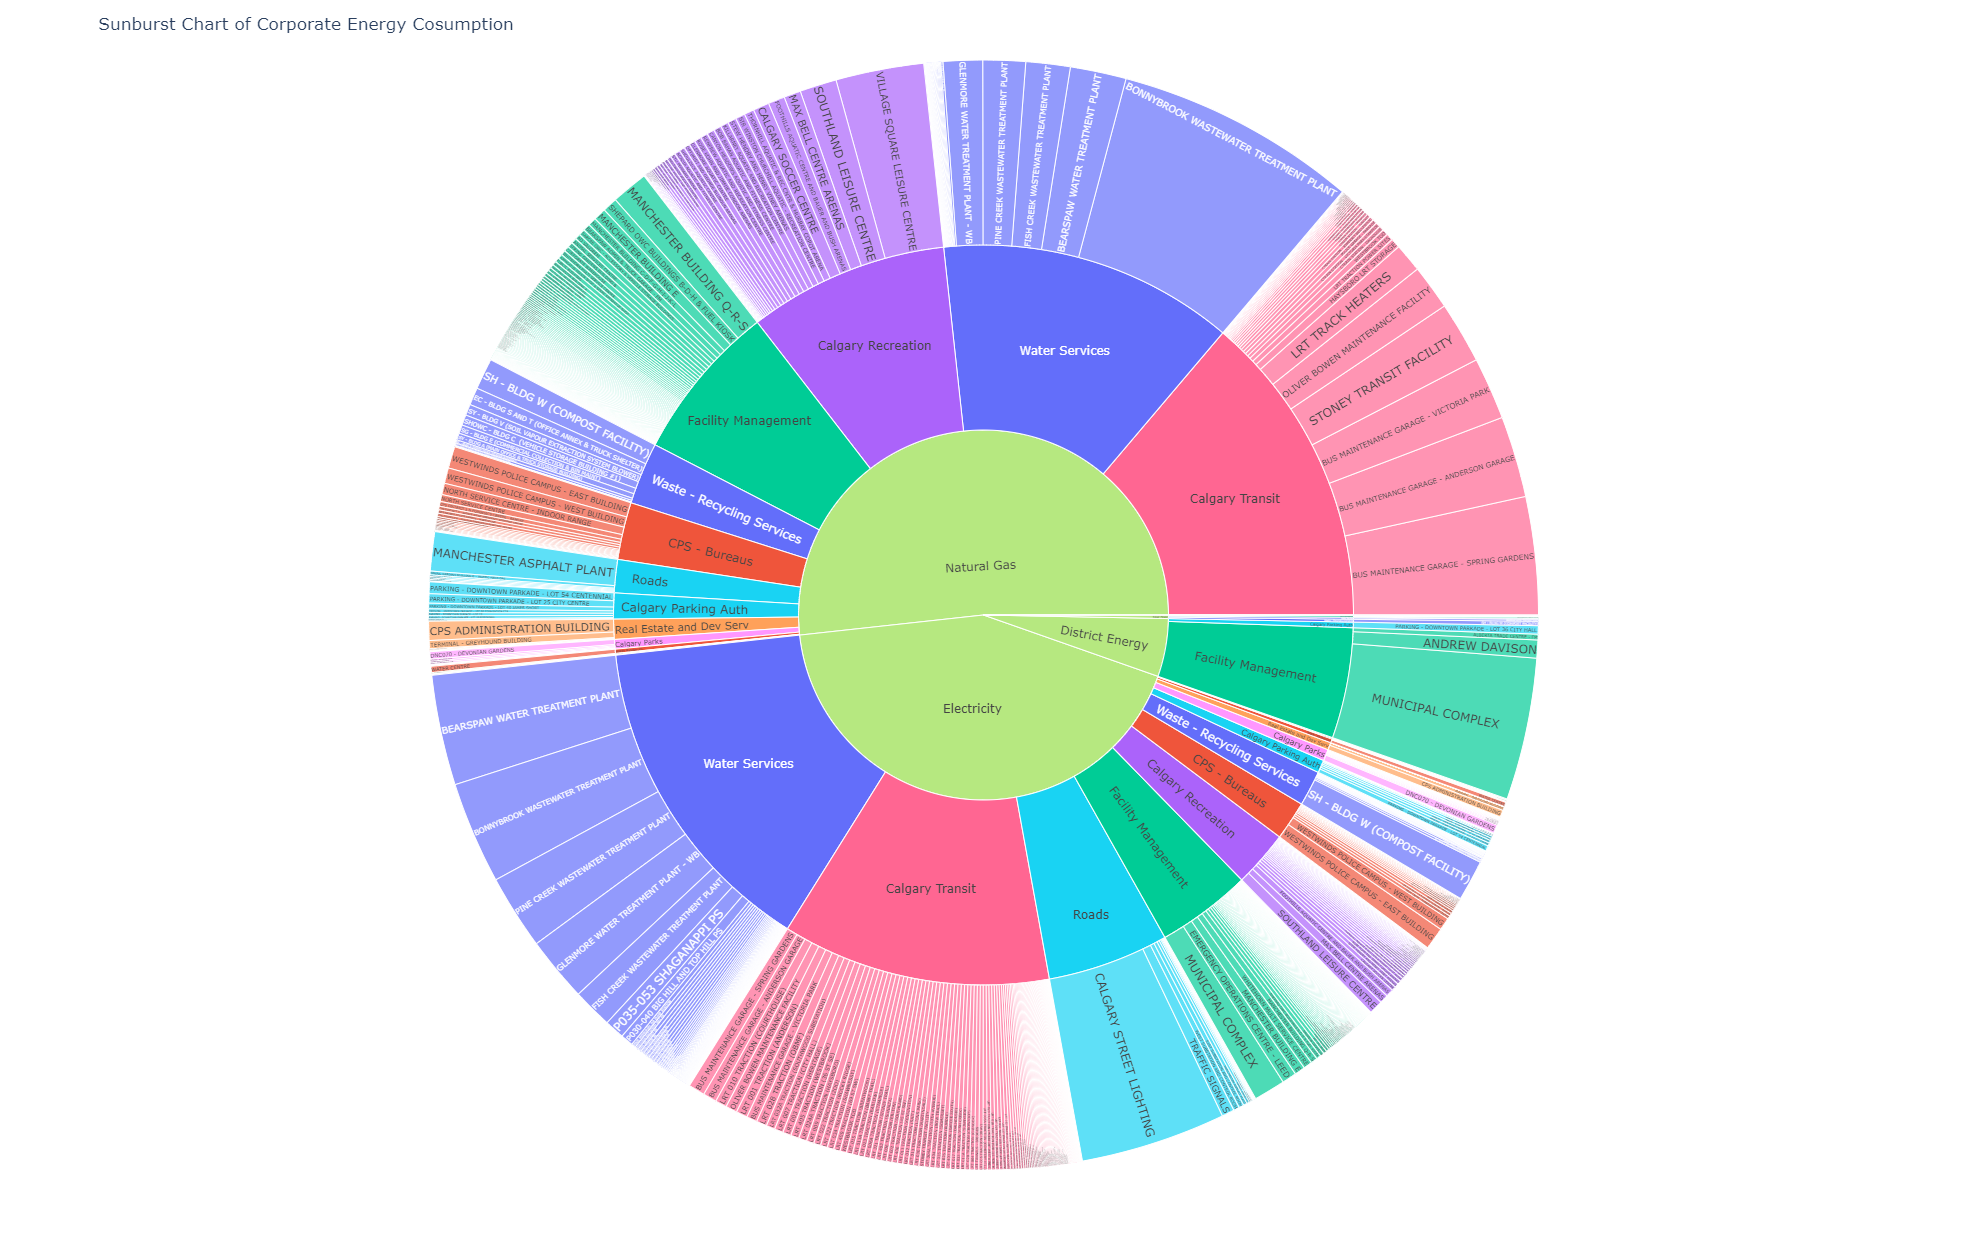

In [28]:
fig = px.sunburst(B2019, path=['Energy Description', 'Business Unit Desc', 'FacilityName'], values='Total Consumption', color = 'Business Unit Desc',width = 1250, height = 1250)
fig.update_layout(
    title_text = 'Sunburst Chart of Corporate Energy Cosumption '    
)
fig.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

_Please provide your responses to the 'compare and contrast' questions in the cell below._

<!--
BEGIN QUESTION
name: q1_comparison
manual: true
-->

- If the task involved quickly identifying all the information at a particular level, sunburst chart would be better.
- Treeamp chart makes more efficient use of screen space real estate.
- Treemap can show more data and is better to compare data among  hierarchical levels. Wheras sunburst chart has full picture of the hierarchy and thereby illustrating the different depths of hierarchical groups.


<!-- END QUESTION -->



## Question 2: Life Expectancy Index (8 points)
 
### Warmup
For this question, we'll use plotly express to produce a choropleth visualization. Please read about this chart type at the Data Viz Catalogue: [Choropleth Map](https://datavizcatalogue.com/methods/choropleth.html).
Please also go through the documentation provided by plotly exprerss and familiarize yourself with the structure of the dataframe from which a choropleth map can be produced: [Choropleth map using builtin country geometries](https://plotly.com/python/choropleth-maps/#using-builtin-country-and-state-geometries).

### Data

The Life Expectancy Index ($\mathrm{LEI}$) is used as part of the [Human Development Index](https://en.wikipedia.org/wiki/Human_Development_Index) which ranks countries into different tiers of human development. The $\mathrm{LEI}$ for a country is defined as:
$$
\mathrm{LEI} = \frac{\mathrm{LE} - 20}{85 - 20},  
$$
where $\mathrm{LE}$ is the life expectancy at birth.

The dataset from which you can compute the $\mathrm{LEI}$ is available on D2L. 

### Tasks

*Using the provided datasets only*, perform the following tasks:

- Merge the provided tables into one table that has the following three columns: `Country` (name of the country), `Code` (three letter country code), `LE` (life expectancy for the year 2017). Then, compute the $\mathrm{LEI}$ for the year 2017 based on the above formula and add it as a column entitled `LEI`.

- Use plotly express and the resulting table to produce a choropleth world map visualization showing the $\mathrm{LEI}$ for the year 2017. Colour map the $\mathrm{LEI}$ values according to the following bins: $[0.5,0.6)$, $[0.6,0.7)$, $[0.7,0.8)$, $[0.8,0.9)$ and $[0.9,1)$, and use a visually distinct colour to identify countries for which the data is not available.
Note that you will have to pass appropriate colour mapping parameters to the choropleth function to achieve this. Please consult the documentation of [plotly.express.choropleth](https://plotly.github.io/plotly.py-docs/generated/plotly.express.choropleth.html) for details. 

<!-- BEGIN QUESTION -->

_Please do data reading, merging and processing in the cell below._

<!--
BEGIN QUESTION
name: q2_cleanup
manual: true
-->

In [5]:
LE = pd.read_excel('Life expenctancy at birth (years).xlsx', index_col=0,header =1)
CC= pd.read_csv('country_codes.csv')
for i in range(27):
    LE = LE.drop([i+1990],axis=1)
LE = LE.reset_index()
LE = LE.dropna()
LE = LE.drop(LE.loc[LE['HDI Rank (2017)']=='n.a'].index)
LEI=LE
LEI[2017] = (LE[2017]-20)/(85-20)
LEI = LEI.rename(columns={2017: 'LEI'}) 
# df[CC.columns] = CC.apply(lambda x: x.str.strip())
CC['Country']=CC['Country'].str.strip()
newLEI = pd.merge(LEI,CC, on = ['Country'], how = 'right')
newLEI.sort_values(by=['LEI'],inplace =True)
display(newLEI)
bins = [0.49,0.6,0.7,0.8,0.9,1]
newLEI['bin']=pd.cut(newLEI['LEI'],bins,right=False)

newLEI['bin']=newLEI['bin'].astype(str)



,HDI Rank (2017),Country,LEI,Code
199,184,Sierra Leone,0.495385,SLE
38,188,Central African Republic,0.506154,CAF
214,186,Chad,0.510769,TCD
162,157,Nigeria,0.521538,NGA
44,170,Côte d'Ivoire,0.524615,CIV
...,...,...,...,...
230,NaN,United States Minor Outlying Islands,NaN,UMI
234,NaN,Holy See (Vatican City State),NaN,VAT
237,NaN,Virgin Islands (British),NaN,VGB
238,NaN,Virgin Islands (U.S.),NaN,VIR


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

_Please provide your code for the choropleth visualization in the cell below._

<!--
BEGIN QUESTION
name: q2_choropleth
manual: true
-->

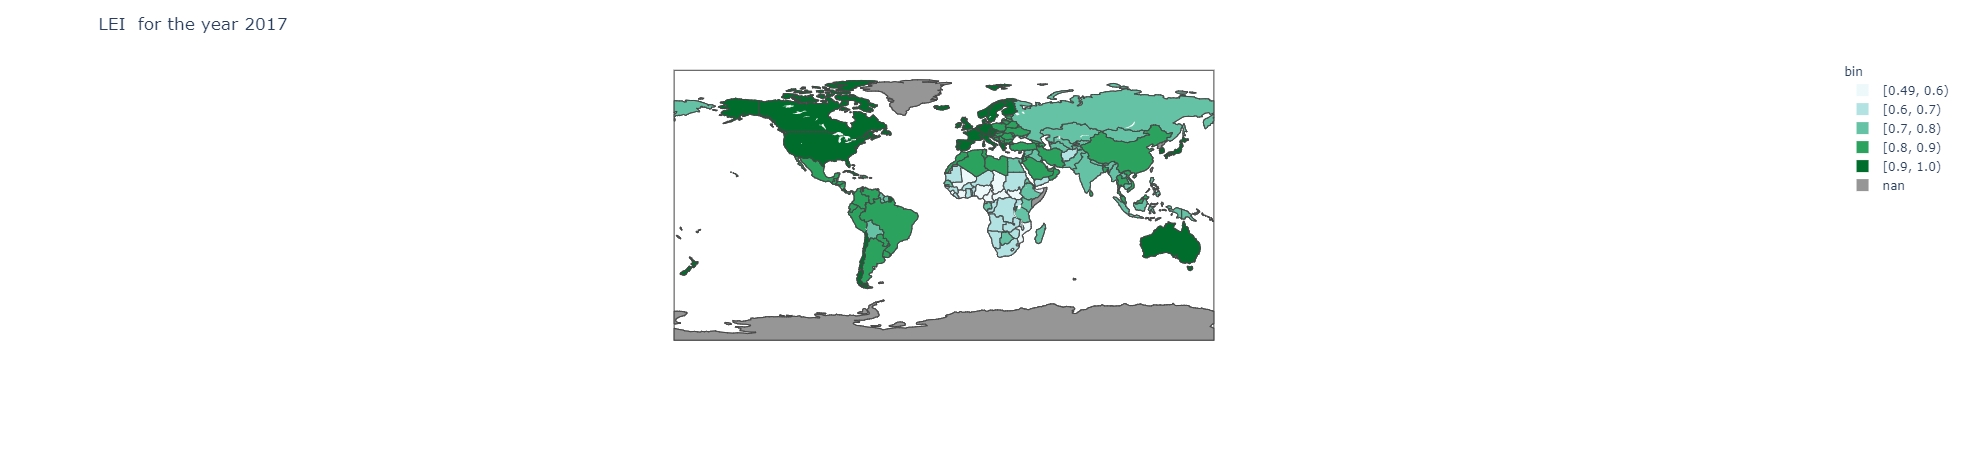

In [48]:

fig=px.choropleth(newLEI,
    locations='Country', # Spatial coordinates
     locationmode = 'country names',
                  color = 'bin',
                  hover_data =['Country','LEI'],
                  hover_name = 'Country',
    color_discrete_map = {"[0.49, 0.6)": "#edf8fb","[0.6, 0.7)": "#b2e2e2","[0.7, 0.8)": "#66c2a4","[0.8, 0.9)": "#2ca25f", "[0.9, 1.0)": "#006d2c","nan":"#969696"})

fig.update_layout(
    title_text = 'LEI  for the year 2017',
    geo_scope='world', 
    
)

fig.show()

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export("HW4.ipynb", pdf=False)